In [1]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
%pip install fbprophet

     |████████████████████████████████| 51kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 37.4MB 3.2MB/s eta 0:00:011
     |████████████████████████████████| 81kB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 2.9MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: //anaconda3/envs/insight/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/l2/zknz20lx0_jcdb37hz8mntlh0000gn/T/pip-install-k5t18vao/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/l2/zknz20lx0_jcdb37hz8mntlh0000gn/T/pip-install-k5t18vao/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/l2/zknz20lx0_jcdb37hz8mntlh0000gn/T/pip-wheel-9fstix9s --python-tag cp37
       cwd: /private/var

In [5]:
%pip install plotly.


ERROR: Invalid requirement: 'plotly.'
Note: you may need to restart the kernel to use updated packages.


In [179]:
data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv")

In [180]:
data2 = data[['monthyear','occupancyRate2']]

In [181]:
data2.columns = ['ds','y']
data2

,ds,y
0,1/1/93,0.279570
1,2/1/93,0.313492
2,3/1/93,0.523297
3,4/1/93,0.616667
4,5/1/93,0.406810
...,...,...
314,3/1/19,0.555556
315,4/1/19,0.537037
316,5/1/19,0.417563
317,6/1/19,0.109259


In [5]:
# Default - daily predictions
m = Prophet()
m.fit(data2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [182]:
# Alternative - monthly data and predictions
m = Prophet(seasonality_mode='multiplicative').fit(data2)

In [14]:
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
1044,2021-06-26
1045,2021-06-27
1046,2021-06-28
1047,2021-06-29
1048,2021-06-30


In [183]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.735921,0.406534,1.059762
1045,2021-06-27,0.736468,0.405191,1.065479
1046,2021-06-28,0.734520,0.391862,1.055439
1047,2021-06-29,0.730264,0.403230,1.070462
1048,2021-06-30,0.723930,0.396798,1.032119


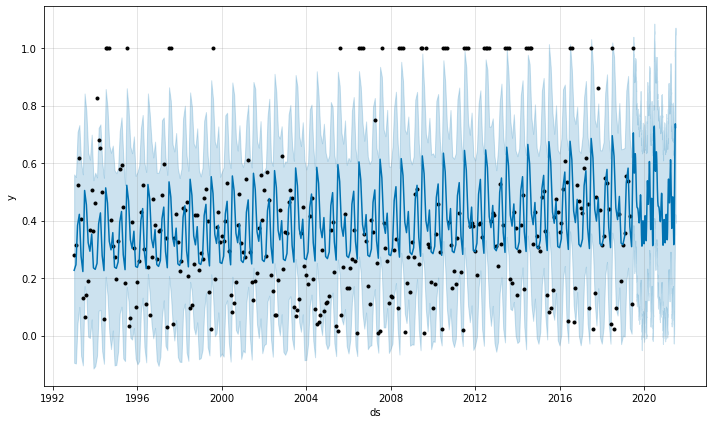

In [184]:
fig1 = m.plot(forecast)


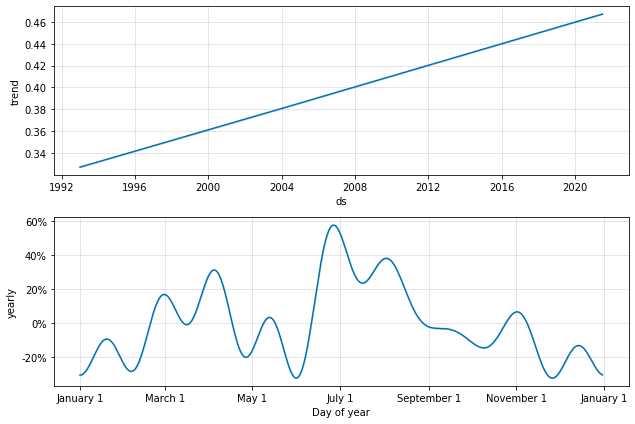

In [105]:
fig2 = m.plot_components(forecast)


In [217]:
#forecast.loc[forecast['ds'] > '20200601 00:00:00']
az = forecast.loc[forecast['ds'] == '2020-07-01 00:00:00']
az
#az['yhat']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
684,2020-07-01,0.462307,0.369791,1.029585,0.462305,0.462309,0.527014,0.527014,0.527014,0.527014,0.527014,0.527014,0.0,0.0,0.0,0.705949


In [17]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [165]:
data2.columns = ['ds','y']
data2

,ds,y
0,1/1/93,0.279570
1,2/1/93,0.313492
2,3/1/93,0.523297
3,4/1/93,0.616667
4,5/1/93,0.406810
...,...,...
314,3/1/19,0.555556
315,4/1/19,0.537037
316,5/1/19,0.417563
317,6/1/19,0.109259


In [18]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = pd.to_timedelta(3,unit = "M"), horizon = pd.to_timedelta(12,unit = "M"))
df_cv.head()

//anaconda3/envs/insight/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)
//anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/tools/timedeltas.py:134: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  result = Timedelta(r, unit)


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1993-07-01,-1.192794,-1.192796,-1.192792,0.064516,1993-06-30 16:40:48
1,1993-08-01,0.353161,0.353151,0.353170,0.141577,1993-06-30 16:40:48
2,1993-09-01,-0.310589,-0.310596,-0.310582,0.188889,1993-06-30 16:40:48
3,1993-10-01,1.115060,1.115043,1.115077,0.365591,1993-06-30 16:40:48
4,1993-11-01,-0.733262,-0.733272,-0.733252,0.507407,1993-06-30 16:40:48


In [10]:
# Cross validation for daily data
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1995-06-01,-0.475704,-0.707930,-0.249319,0.183333,1995-05-03
1,1995-07-01,1.121796,0.883206,1.340534,1.000000,1995-05-03
2,1995-08-01,0.998989,0.775555,1.235213,0.032258,1995-05-03
3,1995-09-01,1.043729,0.795329,1.260603,0.062963,1995-05-03
4,1995-10-01,0.037534,-0.190883,0.250149,0.396057,1995-05-03


In [19]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,31 days 08:45:36,0.193410,0.439784,0.336167,2.664616,0.491803
1,31 days 09:28:48,0.198794,0.445863,0.340470,2.668920,0.491803
2,31 days 10:12:00,0.195487,0.442140,0.337361,3.360182,0.491803
3,31 days 10:55:12,0.195931,0.442641,0.338087,3.302354,0.491803
4,31 days 11:38:24,0.194034,0.440493,0.336798,3.779545,0.491803


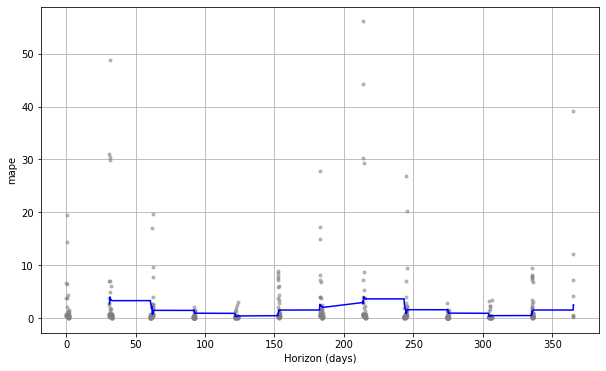

In [20]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [21]:
# Black Rock Campground
data3 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv")
data4 = data3[['monthyear','occupancyRate2']]
data4.columns = ['ds','y']
m2 = Prophet(seasonality_mode='multiplicative').fit(data4)

In [22]:
future2 = m2.make_future_dataframe(periods=730)
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.124321,0.054081,0.191476
1045,2021-06-27,0.114921,0.039445,0.185261
1046,2021-06-28,0.106983,0.037958,0.179661
1047,2021-06-29,0.100721,0.033841,0.171618
1048,2021-06-30,0.096298,0.024002,0.171047


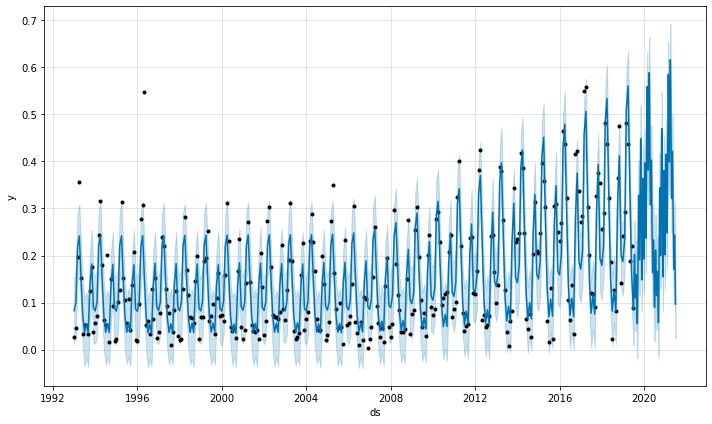

In [23]:
fig2 = m2.plot(forecast2)


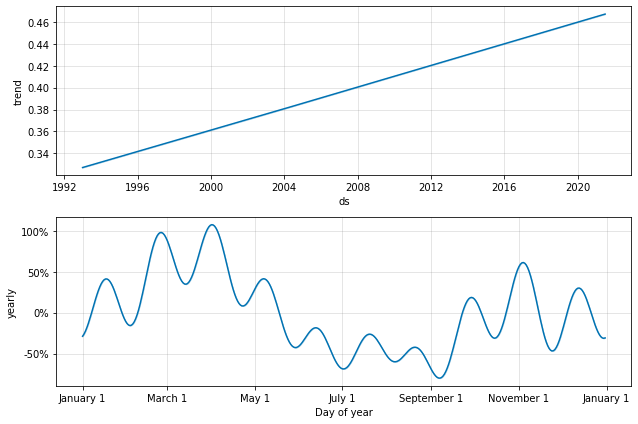

In [111]:
fig2 = m2.plot_components(forecast)


In [24]:
# Cottonwood Campground
data5 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv")
data6 = data5[['monthyear','occupancyRate2']]
data6.columns = ['ds','y']
m3 = Prophet(seasonality_mode='multiplicative').fit(data6)


In [25]:
future3 = m3.make_future_dataframe(periods=730)
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.102169,-0.040700,0.247650
1045,2021-06-27,0.097551,-0.054176,0.238632
1046,2021-06-28,0.093704,-0.051370,0.249688
1047,2021-06-29,0.090739,-0.053826,0.234055
1048,2021-06-30,0.088742,-0.040270,0.228789


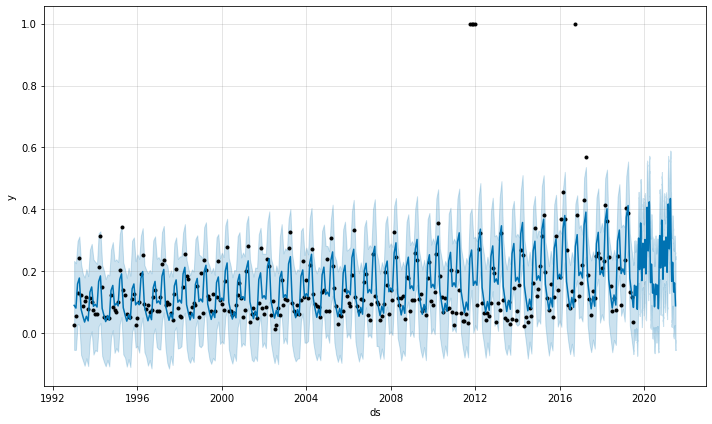

In [26]:
fig3 = m3.plot(forecast3)


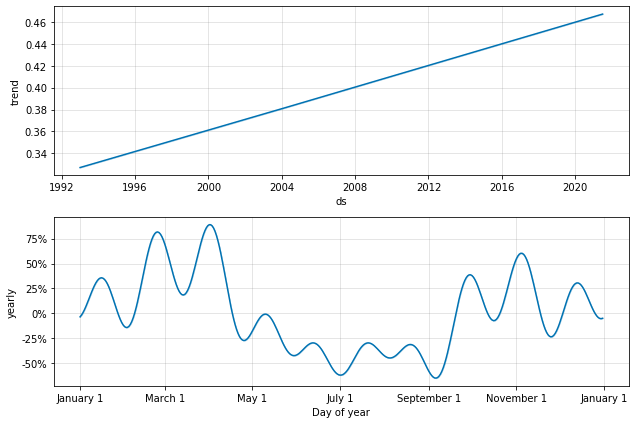

In [115]:
fig3 = m3.plot_components(forecast)


In [27]:
# Hidden Valley Campground
data7 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv")
data8 = data7[['monthyear','occupancyRate2']]
data8.columns = ['ds','y']
m4 = Prophet(seasonality_mode='multiplicative').fit(data8)

In [28]:
future4 = m4.make_future_dataframe(periods=730)
forecast4 = m4.predict(future4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.206817,0.057207,0.357055
1045,2021-06-27,0.203493,0.055473,0.355346
1046,2021-06-28,0.201857,0.047254,0.356550
1047,2021-06-29,0.201966,0.051258,0.351270
1048,2021-06-30,0.203834,0.051729,0.351813


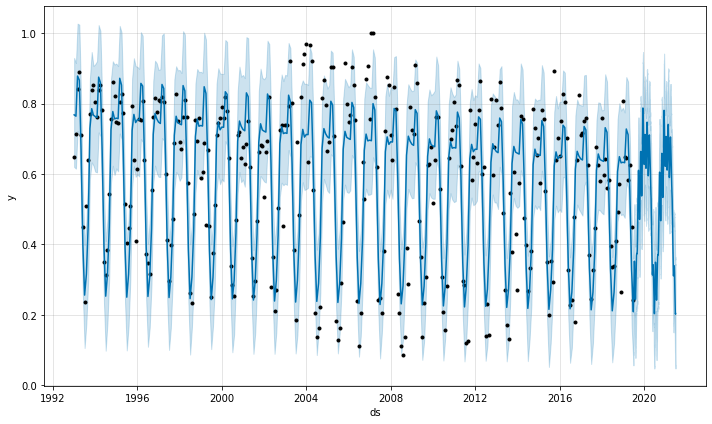

In [118]:
fig4 = m4.plot(forecast4)


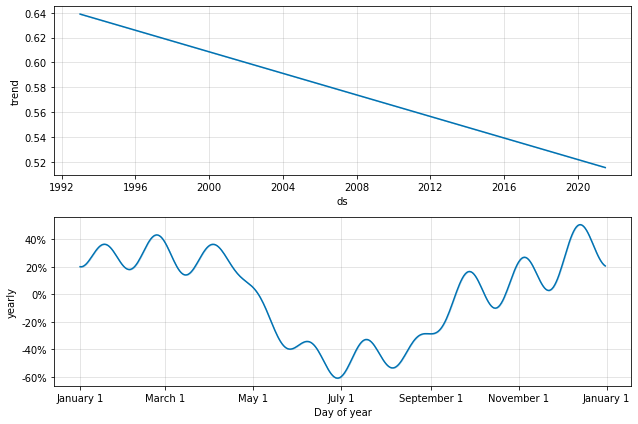

In [119]:
fig4 = m4.plot_components(forecast4)


In [29]:
# Indian Cove Campground
data9 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")
data10 = data9[['monthyear','occupancyRate2']]
data10.columns = ['ds','y']
m5 = Prophet(seasonality_mode='multiplicative').fit(data10)

In [30]:
future5 = m5.make_future_dataframe(periods=730)
forecast5 = m5.predict(future5)
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.094230,-0.013552,0.180418
1045,2021-06-27,0.090765,-0.015119,0.188594
1046,2021-06-28,0.087274,-0.018709,0.190682
1047,2021-06-29,0.083791,-0.014307,0.186519
1048,2021-06-30,0.080343,-0.017389,0.186856


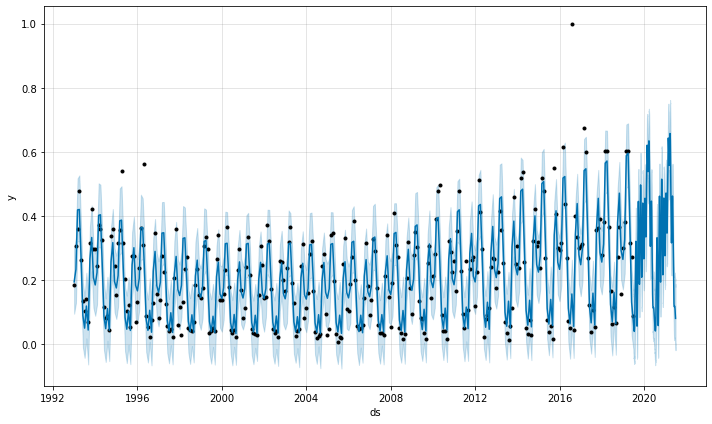

In [122]:
fig5 = m5.plot(forecast5)


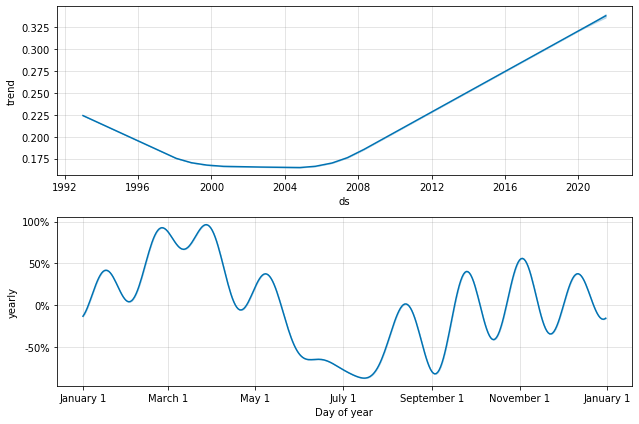

In [123]:
fig5 = m5.plot_components(forecast5)


In [31]:
# Jumbo Rocks Campground
data11 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")
data12 = data11[['monthyear','occupancyRate2']]
data12.columns = ['ds','y']
m6 = Prophet(seasonality_mode='multiplicative').fit(data12)

In [32]:
future6 = m6.make_future_dataframe(periods=730)
forecast6 = m6.predict(future6)
forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.132205,0.033708,0.229099
1045,2021-06-27,0.121853,0.017710,0.219945
1046,2021-06-28,0.113306,0.016231,0.210001
1047,2021-06-29,0.106807,0.004929,0.214986
1048,2021-06-30,0.102538,0.003544,0.196999


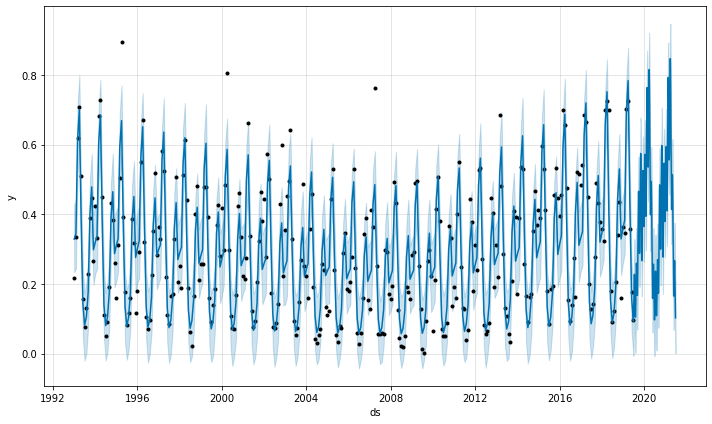

In [131]:
fig6 = m6.plot(forecast6)


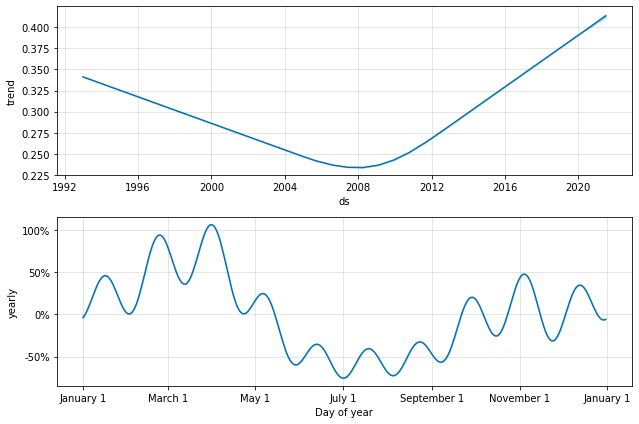

In [132]:
fig6 = m6.plot_components(forecast6)


In [33]:
# Ryan Campground
data13 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv")
data14 = data13[['monthyear','occupancyRate2']]
data14.columns = ['ds','y']
m7 = Prophet(seasonality_mode='multiplicative').fit(data14)

In [34]:
future7 = m7.make_future_dataframe(periods=730)
forecast7 = m7.predict(future7)
forecast7[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.575807,0.226951,0.895823
1045,2021-06-27,0.571117,0.214380,0.913019
1046,2021-06-28,0.565990,0.234793,0.900558
1047,2021-06-29,0.560651,0.224467,0.896523
1048,2021-06-30,0.555315,0.232456,0.892320


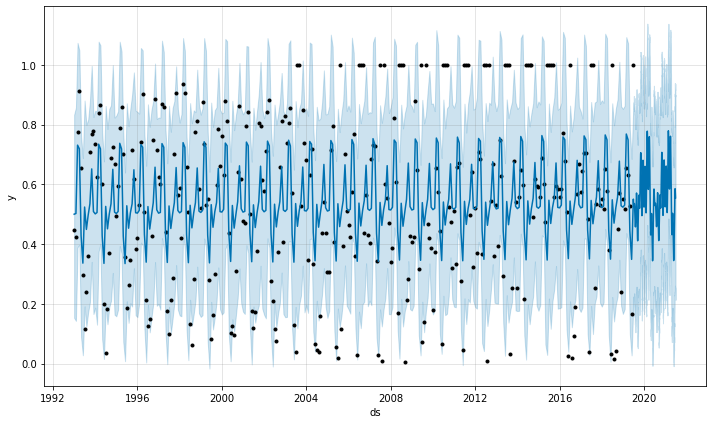

In [134]:
fig7 = m7.plot(forecast7)


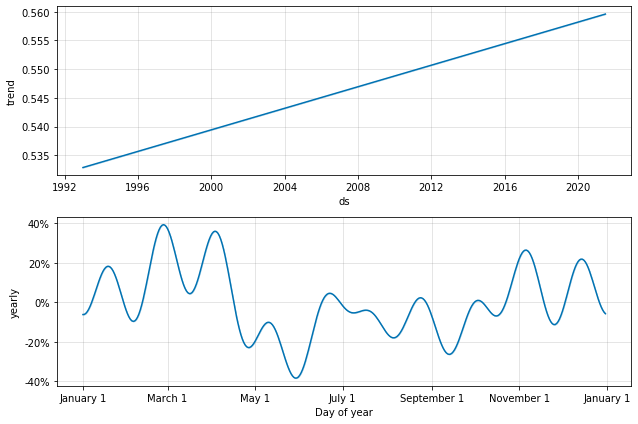

In [135]:
fig7 = m7.plot_components(forecast7)


In [35]:
# White Tank Campground
data15 = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")
data16 = data15[['monthyear','occupancyRate2']]
data16.columns = ['ds','y']
m8 = Prophet(seasonality_mode='multiplicative').fit(data16)

In [36]:
future8 = m8.make_future_dataframe(periods=730)
forecast8 = m8.predict(future8)
forecast8[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2021-06-26,0.659076,0.333432,0.979690
1045,2021-06-27,0.646202,0.326563,0.951139
1046,2021-06-28,0.632483,0.316621,0.945568
1047,2021-06-29,0.618314,0.308134,0.944524
1048,2021-06-30,0.604092,0.316023,0.895058


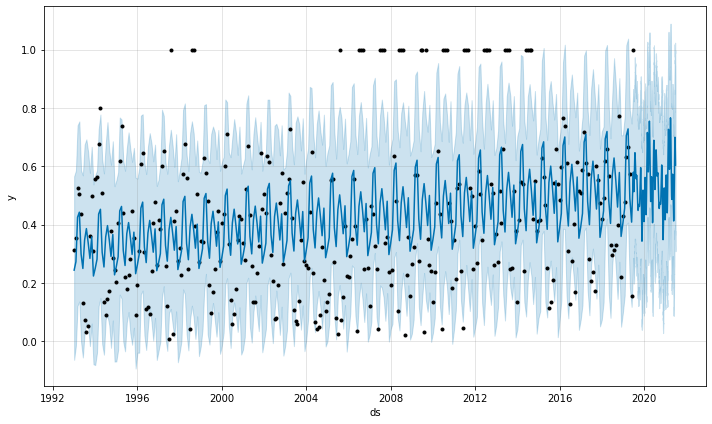

In [37]:
fig8 = m8.plot(forecast8)


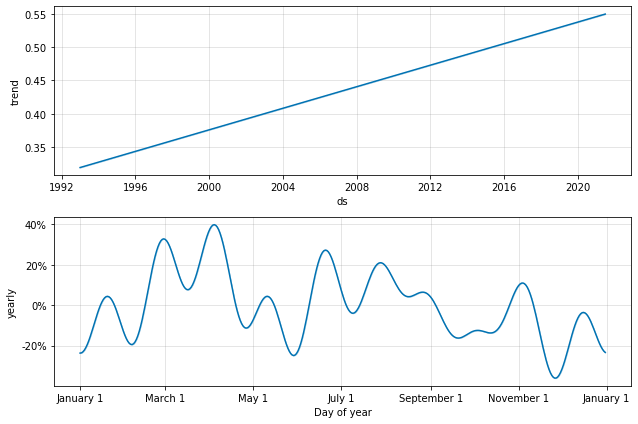

In [139]:
fig8 = m8.plot_components(forecast8)


In [74]:
forecast
forecastabbrev = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev.columns = ['date','belle_yhat','belle_yhat_lower','belle_yhat_upper']
forecast2
forecastabbrev2 = forecast2[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev2.columns = ['date','br_yhat','br_yhat_lower','br_yhat_upper']
forecast3
forecastabbrev3 = forecast3[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev3.columns = ['date','cw_yhat','cw_yhat_lower','cw_yhat_upper']
forecast4
forecastabbrev4 = forecast4[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev4.columns = ['date','hv_yhat','hv_yhat_lower','hv_yhat_upper']
forecast5
forecastabbrev5 = forecast5[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev5.columns = ['date','ic_yhat','ic_yhat_lower','ic_yhat_upper']
forecast6
forecastabbrev6 = forecast6[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev6.columns = ['date','jr_yhat','jr_yhat_lower','jr_yhat_upper']
forecast7
forecastabbrev7 = forecast7[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev7.columns = ['date','ryan_yhat','ryan_yhat_lower','ryan_yhat_upper']
forecast8
forecastabbrev8 = forecast8[['ds','yhat','yhat_lower','yhat_upper']]
forecastabbrev8.columns = ['date','wt_yhat','wt_yhat_lower','wt_yhat_upper']
#forecastabbrev
forecastabbrev10=pd.merge(forecastabbrev, forecastabbrev2, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev3, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev4, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev5, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev6, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev7, on='date',how='right')
forecastabbrev10=pd.merge(forecastabbrev10, forecastabbrev8, on='date',how='right')

forecastabbrev10.to_csv(r"~/Documents/campgroundpredictions_twoyears.csv")

In [142]:
forecastabbrev10 = pd.read_csv("~/Documents/campgroundpredictions_twoyears.csv")

In [102]:
input = "2020-07-01"
input2 = str(input)
input2

'2020-07-01'

In [143]:
input = "2020-08-01"

az = forecastabbrev10.loc[forecastabbrev10['date'] == input]
az

,Unnamed: 0,date,belle_yhat,belle_yhat_lower,belle_yhat_upper,br_yhat,br_yhat_lower,br_yhat_upper,cw_yhat,cw_yhat_lower,...,ic_yhat_upper,jr_yhat,jr_yhat_lower,jr_yhat_upper,ryan_yhat,ryan_yhat_lower,ryan_yhat_upper,wt_yhat,wt_yhat_lower,wt_yhat_upper
715,715,2020-08-01,0.638408,0.302097,0.963079,0.133994,0.061905,0.203716,0.129068,-0.018,...,0.285729,0.12341,0.028738,0.226913,0.469544,0.133091,0.822709,0.645145,0.343007,0.958971


In [160]:
input = "2020-08-01"

forecastabbrev10 = pd.read_csv("~/Documents/campgroundpredictions_twoyears.csv")
az = forecastabbrev10.loc[forecastabbrev10['date'] == input]
az
az2=az[['belle_yhat','br_yhat','cw_yhat','hv_yhat','ic_yhat','jr_yhat','ryan_yhat','wt_yhat']]
az3=pd.DataFrame(az2)
az3.columns=['Belle','Black Rock','Cottonwood','Hidden Valley','Indian Cove','Jumbo Rocks','Ryan','White Tank']
az3=pd.melt(az2)
az3=az3.sort_values('value')
az3=az3.reset_index()
bestcamp = (az3['variable'][0])
bcocc = (az3['value'][0])
bestcamp2 = (az3['variable'][1])
bcocc2 = (az3['value'][1])
bestcamp3 = (az3['variable'][2])
bcocc3 = (az3['value'][2])
print('Camps by Likelihood of Availability on',input)
print()
print('Best Camp: ')
print(bestcamp)
print('Predicted Monthly Occupancy: ',bcocc)
print()
print('Next Best Camp: ')
print(bestcamp2)
print('Predicted Monthly Occupancy: ', bcocc2)
print()
print('Third Best Camp: ')
print(bestcamp3)
print('Predicted Monthly Occupancy: ',bcocc3)
print()

Camps by Likelihood of Availability on 2020-08-01

Best Camp: 
Jumbo Rocks
Predicted Monthly Occupancy:  0.12341014307754615

Next Best Camp: 
Cottonwood
Predicted Monthly Occupancy:  0.12906751618343204

Third Best Camp: 
Black Rock
Predicted Monthly Occupancy:  0.13399351682054206



In [113]:
bestcamp = (az3['variable'][0])
bcocc = (az3['value'][0])
print(bestcamp)
print(bcocc)

Indian Cove
0.07351072049192119


In [165]:
az3['likely'] = 1 - az3['value']
az3

,index,variable,value,likely
0,5,Jumbo Rocks,0.123410,0.876590
1,2,Cottonwood,0.129068,0.870932
2,1,Black Rock,0.133994,0.866006
3,4,Indian Cove,0.182289,0.817711
4,3,Hidden Valley,0.256105,0.743895
5,6,Ryan,0.469544,0.530456
6,0,Belle,0.638408,0.361592
7,7,White Tank,0.645145,0.354855


In [166]:
data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv")
data.head()

,index,timeIndex,Group.Description,Campground,This.Month,month,year,monthNum,monthyear,daysPerMonth,numCamps,totalPossOccupant,occupancyRate,occupancyRate2
0,853,5,Tent Sites Occupied,Belle,156,Jan,1993,1,1/1/93,31,18,558,0.279570,0.279570
1,637,13,Tent Sites Occupied,Belle,158,Feb,1993,2,2/1/93,28,18,504,0.313492,0.313492
2,1501,21,Tent Sites Occupied,Belle,292,Mar,1993,3,3/1/93,31,18,558,0.523297,0.523297
3,5,29,Tent Sites Occupied,Belle,333,Apr,1993,4,4/1/93,30,18,540,0.616667,0.616667
4,1717,37,Tent Sites Occupied,Belle,227,May,1993,5,5/1/93,31,18,558,0.406810,0.406810


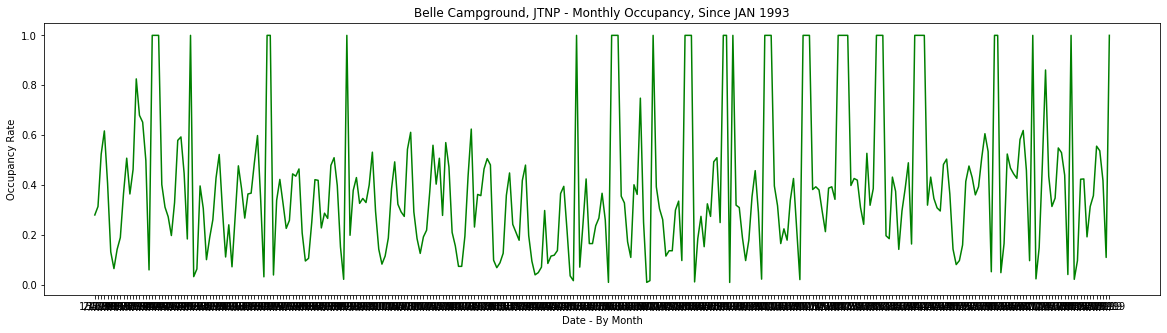

In [178]:
import matplotlib.pyplot as plt


x = data['monthyear']
y = data['occupancyRate2']
plt.figure(figsize=(20,5))
plt.plot(x, y, color='g')
plt.ylabel('Occupancy Rate')
plt.xlabel('Date - By Month')
plt.title('Belle Campground, JTNP - Monthly Occupancy, Since JAN 1993')
plt.show()

0      1/1/93
1      2/1/93
2      3/1/93
3      4/1/93
4      5/1/93
        ...  
314    3/1/19
315    4/1/19
316    5/1/19
317    6/1/19
318    7/1/19
Name: monthyear, Length: 319, dtype: object